# Projeto PyTorch

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import torch 
import torch.nn as nn

## Etapa 2: Importação da base dados

In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [3]:
datasetInput = pd.read_csv('entradas_breast.csv')
datasetOuput = pd.read_csv('saidas_breast.csv')

In [4]:
datasetInput.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [5]:
datasetOuput.head()

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
np.unique(datasetOuput)

array([0, 1], dtype=int64)

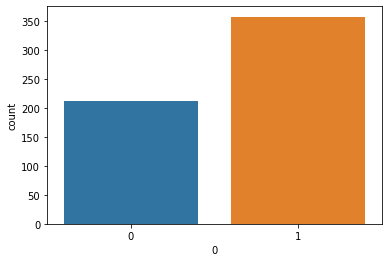

In [7]:
# Visualizando as duas classes
sns.countplot(datasetOuput['0'])

In [8]:
# Separando nossos dados de Treino e Teste
X_treinamento,X_teste,y_treinamento,y_teste = train_test_split(datasetInput,datasetOuput,test_size=0.25)

In [9]:
X_treinamento.shape

(426, 30)

In [10]:
X_teste.shape

(143, 30)

## Etapa 3: Transformação dos dados para tensores 

In [11]:
type(X_treinamento)

pandas.core.frame.DataFrame

In [12]:
type(np.array(X_treinamento))

numpy.ndarray

In [13]:
X_treinamento = torch.tensor(np.array(X_treinamento),dtype=torch.float)

In [14]:
X_treinamento.shape

torch.Size([426, 30])

In [15]:
X_treinamento

tensor([[1.1540e+01, 1.4440e+01, 7.4650e+01,  ..., 6.9180e-02, 2.3290e-01,
         8.1340e-02],
        [2.0310e+01, 2.7060e+01, 1.3290e+02,  ..., 1.6970e-01, 3.1510e-01,
         7.9990e-02],
        [1.1360e+01, 1.7570e+01, 7.2490e+01,  ..., 8.6980e-02, 2.9730e-01,
         7.7450e-02],
        ...,
        [1.2050e+01, 2.2720e+01, 7.8750e+01,  ..., 1.0920e-01, 2.1910e-01,
         9.3490e-02],
        [2.0440e+01, 2.1780e+01, 1.3380e+02,  ..., 1.7650e-01, 2.6090e-01,
         6.7350e-02],
        [1.1740e+01, 1.4690e+01, 7.6310e+01,  ..., 1.0560e-01, 2.6040e-01,
         9.8790e-02]])

In [16]:
y_treinamento = torch.tensor(np.array(y_treinamento),dtype=torch.float)

In [17]:
dataset = torch.utils.data.TensorDataset(X_treinamento,y_treinamento)

In [18]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [19]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção da rede neural





In [20]:
#30 -> 16 -> 16 -> 1

model = nn.Sequential(
    nn.Linear(in_features = 30,out_features=16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid() # Retorna valor entre 0 e 1
)

In [21]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [22]:
criterion = nn.BCELoss()

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento da rede

In [24]:
for epoch in range(1000):
    sum_loss = 0
    for data in train_loader:
        xi,yi = data
        optimizer.zero_grad()
        saidas = model.forward(xi)
        loss = criterion(saidas,yi)
        loss.backward()
        optimizer.step()

        sum_loss += loss.item()
    print('Época %d : perda %.5f'%(epoch+1, sum_loss/len(train_loader)))

Época 1 : perda 10.99630
Época 2 : perda 3.80302
Época 3 : perda 3.57072
Época 4 : perda 3.41478
Época 5 : perda 3.38310
Época 6 : perda 3.35264
Época 7 : perda 3.35849
Época 8 : perda 3.34306
Época 9 : perda 3.31429
Época 10 : perda 3.31778
Época 11 : perda 3.27551
Época 12 : perda 3.28760
Época 13 : perda 3.25985
Época 14 : perda 3.27704
Época 15 : perda 3.44482
Época 16 : perda 3.27046
Época 17 : perda 3.38948
Época 18 : perda 3.23442
Época 19 : perda 3.38343
Época 20 : perda 3.22839
Época 21 : perda 3.25533
Época 22 : perda 3.32165
Época 23 : perda 3.24175
Época 24 : perda 3.19307
Época 25 : perda 3.24402
Época 26 : perda 3.18710
Época 27 : perda 3.19956
Época 28 : perda 3.19162
Época 29 : perda 3.19148
Época 30 : perda 3.17770
Época 31 : perda 3.21046
Época 32 : perda 3.18379
Época 33 : perda 3.18577
Época 34 : perda 3.19695
Época 35 : perda 3.24441
Época 36 : perda 3.24656
Época 37 : perda 3.26068
Época 38 : perda 3.17016
Época 39 : perda 3.20712
Época 40 : perda 3.22240
Época 41

Época 635 : perda 0.05955
Época 636 : perda 0.03209
Época 637 : perda 0.02919
Época 638 : perda 0.03463
Época 639 : perda 0.03352
Época 640 : perda 0.05375
Época 641 : perda 0.13944
Época 642 : perda 0.17011
Época 643 : perda 0.05558
Época 644 : perda 0.04036
Época 645 : perda 0.03414
Época 646 : perda 0.03544
Época 647 : perda 0.03520
Época 648 : perda 0.03247
Época 649 : perda 0.03382
Época 650 : perda 0.03266
Época 651 : perda 0.03290
Época 652 : perda 0.03342
Época 653 : perda 0.03124
Época 654 : perda 0.03061
Época 655 : perda 0.03014
Época 656 : perda 0.02807
Época 657 : perda 0.03694
Época 658 : perda 0.03106
Época 659 : perda 0.03415
Época 660 : perda 0.04069
Época 661 : perda 0.07766
Época 662 : perda 0.09636
Época 663 : perda 0.14872
Época 664 : perda 0.33555
Época 665 : perda 0.28526
Época 666 : perda 0.27529
Época 667 : perda 0.16082
Época 668 : perda 0.05451
Época 669 : perda 0.28387
Época 670 : perda 0.04356
Época 671 : perda 0.03397
Época 672 : perda 0.03868
Época 673 : 

## Etapa 6: Visualização dos pesos

In [25]:
params = list(model.parameters())
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [26]:
print(pesos0)

Parameter containing:
tensor([[-3.8546e-01, -6.8412e-01, -3.7806e-01,  3.4219e-02,  9.6729e-02,
          1.8673e-02,  9.2617e-02,  1.9712e-02, -2.2701e-02,  4.5489e-01,
          5.1713e-02, -1.8309e-02, -5.1198e-02,  1.7017e-01,  9.3667e-05,
         -4.3663e-02,  3.9667e-02,  1.4397e-03,  6.8141e-01,  2.5912e-02,
         -2.7203e-01, -7.0616e-01, -2.2815e-01,  1.3665e-01, -1.9458e-02,
          1.5015e-01, -2.8939e-01,  6.0553e-02, -3.8405e-02, -6.9967e-03],
        [ 7.1046e-01, -2.0617e-03,  7.1852e-01,  1.9343e-01, -5.0275e-01,
          6.3833e-01, -5.5340e-01,  9.7418e-02,  3.9100e-02, -5.0183e-01,
         -2.1290e-01, -6.1585e-02, -4.7095e-02, -5.5592e-02, -1.8442e-03,
          2.7916e-02,  1.4743e-01, -2.0803e-02, -7.6303e-01, -7.1539e-03,
          7.3212e-01, -4.1245e-01,  4.1412e-01, -4.5000e-02, -1.0329e-01,
          1.0071e-01, -6.5133e-01,  1.7939e-01, -6.2097e-01, -1.1543e-01],
        [-2.2785e-11, -1.3317e-10, -2.9893e-03, -2.1758e-02, -1.3459e-18,
          1.85

In [27]:
bias0 =params[1]
bias0.shape

torch.Size([16])

In [28]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

## Etapa 7: Fase de Teste

In [29]:
model.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [30]:
X_teste = torch.tensor(np.array(X_teste), dtype=torch.float)

In [31]:
type(X_teste)

torch.Tensor

In [32]:
saidas_teste = model.forward(X_teste)

In [33]:
saidas_teste

tensor([[9.9899e-01],
        [1.0000e+00],
        [9.5384e-01],
        [1.0000e+00],
        [4.8911e-08],
        [1.0000e+00],
        [9.9995e-01],
        [1.0000e+00],
        [9.9834e-01],
        [1.0000e+00],
        [1.0000e+00],
        [9.9991e-01],
        [1.0000e+00],
        [1.0000e+00],
        [4.6254e-01],
        [7.5863e-02],
        [1.0000e+00],
        [1.0000e+00],
        [9.4419e-01],
        [1.0000e+00],
        [1.4321e-19],
        [7.8065e-06],
        [9.7757e-01],
        [1.0000e+00],
        [9.9987e-01],
        [3.0512e-03],
        [1.3336e-01],
        [1.0000e+00],
        [2.9454e-10],
        [1.0000e+00],
        [9.6566e-01],
        [1.0000e+00],
        [9.9999e-01],
        [9.9999e-01],
        [8.3148e-01],
        [1.0000e+00],
        [9.9999e-01],
        [1.0000e+00],
        [1.0000e+00],
        [4.1795e-05],
        [3.3552e-02],
        [9.5149e-01],
        [4.6131e-01],
        [8.4359e-01],
        [4.0030e-07],
        [9

In [34]:
saidas_teste = np.array(saidas_teste > 0.5)

In [36]:
taxa_acerto = accuracy_score(y_teste,saidas_teste)
taxa_acerto

0.8881118881118881

In [37]:
matriz = confusion_matrix(y_teste,saidas_teste)

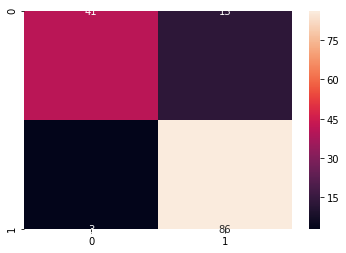

In [38]:
sns.heatmap(matriz, annot=True);

# Parte 2: Validação cruzada e dropout com o PyTorch

## Etapa 1: Importacação das bibliotecas

In [39]:
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score
import torch.nn as nn

## Etapa 2: Base de dados

In [40]:
datasetInput = np.array(datasetInput, dtype='float32')
datasetInput.shape

datasetOuput = np.array(datasetOuput, dtype='float32').squeeze(1)
datasetOuput.shape

(569,)

## Etapa 3: Definir uma classe para estrutura da rede

In [41]:
# Tem que herda a classe nn.Module
class model_nn_torch(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 30 ->16 ->16 ->1
        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.uniform_(self.dense0.weight) # Pesos iniciando com distribuicao uniforme
        self.activation0 = nn.ReLU()
        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X
        
    

## Etapa 4: Skorch

In [42]:
nn_sklearn = NeuralNetBinaryClassifier(module=model_nn_torch, 
                                      criterion=torch.nn.BCELoss,
                                      optimizer=torch.optim.Adam,
                                      lr=0.0001,
                                      optimizer__weight_decay = 0.001,
                                      max_epochs=100,
                                      batch_size=10,
                                      train_split=False # Para ser executado pelo sklearn
                                      )

## Etap 5: Cross-Validation

In [43]:
resultado = cross_val_score(nn_sklearn, datasetInput, datasetOuput, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0782
      2       37.1094  0.0539
      3       37.1094  0.0499
      4       37.1094  0.0509
      5       37.1094  0.0539
      6       37.1094  0.0559
      7       37.1094  0.0598
      8       37.1094  0.0608
      9       37.1094  0.0598
     10       37.1094  0.0539
     11       37.1094  0.0529
     12       37.1094  0.0499
     13       37.1094  0.0509
     14       37.1094  0.0499
     15       37.1094  0.0509
     16       37.1094  0.0503
     17       37.1094  0.0509
     18       37.1094  0.0519
     19       37.1094  0.0509
     20       37.1094  0.0509
     21       37.1094  0.0519
     22       37.1094  0.0539
     23       37.1094  0.0549
     24       37.1094  0.0519
     25       37.1094  0.0539
     26       37.1094  0.0519
     27       37.1094  0.0509
     28       37.1094  0.0499
     29       37.1094  0.0519
     30       37.1094  0.0529
     31       37.1094  0.0578
     32   

     35       37.3047  0.0529
     36       37.3047  0.0539
     37       37.3047  0.0519
     38       37.3047  0.0529
     39       37.3047  0.0539
     40       37.3047  0.0529
     41       37.3047  0.0529
     42       37.3047  0.0519
     43       37.3047  0.0519
     44       37.3047  0.0529
     45       37.3047  0.0539
     46       37.3047  0.0548
     47       37.3047  0.0532
     48       37.3047  0.0539
     49       37.3047  0.0568
     50       37.3047  0.0539
     51       37.3047  0.0539
     52       37.3047  0.0529
     53       37.3047  0.0519
     54       37.3047  0.0549
     55       37.3047  0.1182
     56       37.3047  0.0953
     57       37.3047  0.0584
     58       37.3047  0.0947
     59       37.3047  0.0628
     60       37.3047  0.0628
     61       37.3047  0.0568
     62       37.3047  0.0608
     63       37.3047  0.0568
     64       37.3047  0.0559
     65       37.3047  0.0509
     66       37.3047  0.0678
     67       37.3047  0.0618
     68   

In [44]:
resultado

array([0.61403509, 0.61403509, 0.63157895, 0.63157895, 0.63157895,
       0.63157895, 0.63157895, 0.63157895, 0.63157895, 0.625     ])

## Etapa 6: Dropout


In [48]:
# Tem que herda a classe nn.Module
class model_nn_torch(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 30 ->16 ->16 ->1
        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.uniform_(self.dense0.weight) # Pesos iniciando com distribuicao uniforme
        self.activation0 = nn.ReLU()
        self.dropout0 = nn.Dropout(20)
        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(20) # Zerando 20% dos neurônios
        self.dense2 = nn.Liner(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dropout1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X
        
    

In [46]:
resultado = cross_val_score(nn_sklearn, datasetInput, datasetOuput, cv=10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0598
      2       37.1094  0.0628
      3       37.1094  0.0539
      4       37.1094  0.0499
      5       37.1094  0.0549
      6       37.1094  0.0539
      7       37.1094  0.0519
      8       37.1094  0.0499
      9       37.1094  0.0509
     10       37.1094  0.0509
     11       37.1094  0.0509
     12       37.1094  0.0529
     13       37.1094  0.0549
     14       37.1094  0.0519
     15       37.1094  0.0549
     16       37.1094  0.0549
     17       37.1094  0.0529
     18       37.1094  0.0549
     19       37.1094  0.0539
     20       37.1094  0.0539
     21       37.1094  0.0628
     22       37.1094  0.0578
     23       37.1094  0.0549
     24       37.1094  0.0549
     25       37.1094  0.0568
     26       37.1094  0.0519
     27       37.1094  0.0499
     28       37.1094  0.0499
     29       37.1094  0.0489
     30       37.1094  0.0499
     31       37.1094  0.0559
     32   

     35       37.3047  0.0529
     36       37.3047  0.0519
     37       37.3047  0.0519
     38       37.3047  0.0499
     39       37.3047  0.0519
     40       37.3047  0.0519
     41       37.3047  0.0509
     42       37.3047  0.0529
     43       37.3047  0.0519
     44       37.3047  0.0539
     45       37.3047  0.0539
     46       37.3047  0.0529
     47       37.3047  0.0509
     48       37.3047  0.0529
     49       37.3047  0.0524
     50       37.3047  0.0509
     51       37.3047  0.0509
     52       37.3047  0.0519
     53       37.3047  0.0519
     54       37.3047  0.0514
     55       37.3047  0.0519
     56       37.3047  0.0506
     57       37.3047  0.0519
     58       37.3047  0.0529
     59       37.3047  0.0529
     60       37.3047  0.0529
     61       37.3047  0.0519
     62       37.3047  0.0529
     63       37.3047  0.0529
     64       37.3047  0.0529
     65       37.3047  0.0529
     66       37.3047  0.0539
     67       37.3047  0.0529
     68   

In [47]:
resultado

array([0.61403509, 0.61403509, 0.63157895, 0.63157895, 0.63157895,
       0.63157895, 0.63157895, 0.63157895, 0.63157895, 0.625     ])